logs/encoder_freeze_100k/train_fixed.log
time_elapsed: 18332 seconds or 305 minutes
Final reward:  742.9513898151093
logs/CURL_100k/train.log
time_elapsed: 26121 seconds or 435 minutes
Final reward:  703.4106712586156


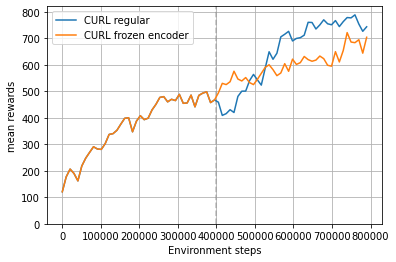

logs/encoder_freeze_100k/train_fixed.log
time_elapsed: 18332 seconds or 305 minutes
Final reward:  758.5642848209209
logs/CURL_100k/train.log
time_elapsed: 26121 seconds or 435 minutes
Final reward:  604.3358929756138


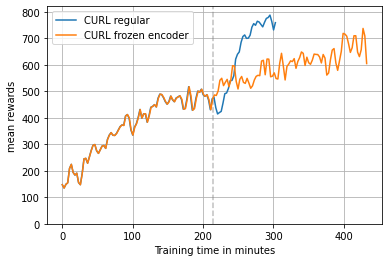

In [61]:
import json
import os
import time

import numpy as np
from matplotlib import pyplot as plt
from torch.utils.tensorboard import SummaryWriter

import utils
from logger import Logger
from plot_data import plot_data, read_file, create_average_reward_list, plot_average, get_file
from train import make_agent, parse_args

calculate_average_each_step = 10000
average_over_last_steps = 15000
plots = []
plt.axvline(x=400000, color='grey', linestyle='dashed', alpha=0.5)
_, plot = plot_data("encoder_freeze_100k/train_fixed.log", average_over_last_steps=average_over_last_steps,
          calculate_average_each_step=calculate_average_each_step,
          max_step=8e5)
plots.append(plot)
_, plot = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
          calculate_average_each_step=calculate_average_each_step, max_step=8e5)
plots.append(plot)
plt.ylim((0,820))
plt.grid()
plt.legend(plots, ["CURL regular", "CURL frozen encoder"])
plt.savefig("docs/images/freezed_encoder_steps")
plt.show()

calculate_average_each_step_time = calculate_average_each_step /65
average_over_last_steps_time = average_over_last_steps /50
plt.axvline(x=215, color='grey', linestyle='dashed', alpha=0.5)
_, plot = plot_data("encoder_freeze_100k/train_fixed.log", average_over_last_steps=average_over_last_steps_time,
          calculate_average_each_step=calculate_average_each_step_time,
          max_step=8e5+10, x_axis_duration=True)
plots.append(plot)
_, plot = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps_time,
          calculate_average_each_step=calculate_average_each_step_time, max_step=8e5, x_axis_duration=True)
plots.append(plot)
plt.legend(plots, ["CURL regular", "CURL frozen encoder"])
# plt.xlabel()
plt.ylim((0,820))

plt.grid()
plt.savefig("docs/images/freezed_encoder_minutes")
plt.show()

logs/CURL_100k/train.log
time_elapsed: 16292 seconds or 271 minutes
Final reward:  529.8844213666416
logs/CURL_50k/train.log
time_elapsed: 60458 seconds or 1007 minutes
Final reward:  520.2359285445319
logs/SAC-AE_100k/train.log
time_elapsed: 25868 seconds or 431 minutes
Final reward:  513.2250201843834
logs/SAC-AE_50k/train.log
time_elapsed: 72772 seconds or 1212 minutes
Final reward:  385.2669140615452
logs/CURL_5k/train.log
time_elapsed: 52273 seconds or 871 minutes
Final reward:  441.7406888330456
[<matplotlib.lines.Line2D object at 0x7ff867d3d2b0>, <matplotlib.lines.Line2D object at 0x7ff84bc51a58>, <matplotlib.lines.Line2D object at 0x7ff867d3dbe0>, <matplotlib.lines.Line2D object at 0x7ff867d3d2e8>, <matplotlib.lines.Line2D object at 0x7ff867d3dc18>]
logs/SAC-AE_5k/train.log
time_elapsed: 71174 seconds or 1186 minutes
Final reward:  564.5605004738379
[<matplotlib.lines.Line2D object at 0x7ff867d3d2b0>, <matplotlib.lines.Line2D object at 0x7ff84bc51a58>, <matplotlib.lines.Line2D 

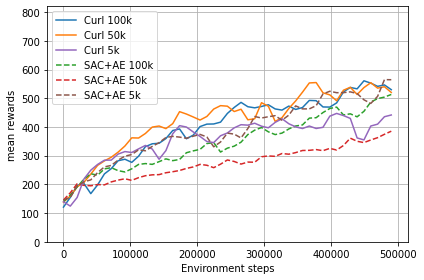

logs/CURL_100k/train.log
time_elapsed: 32594 seconds or 543 minutes
Final reward:  727.0921312635313
logs/CURL_50k/train.log
time_elapsed: 107036 seconds or 1783 minutes
Final reward:  657.5549454873482
logs/SAC-AE_100k/train.log
time_elapsed: 45855 seconds or 764 minutes
Final reward:  807.7430794805845
logs/SAC-AE_50k/train.log
time_elapsed: 121139 seconds or 2018 minutes
Final reward:  817.8258128331439
[<matplotlib.lines.Line2D object at 0x7ff8382370b8>, <matplotlib.lines.Line2D object at 0x7ff869416f28>, <matplotlib.lines.Line2D object at 0x7ff838237940>, <matplotlib.lines.Line2D object at 0x7ff838237dd8>]


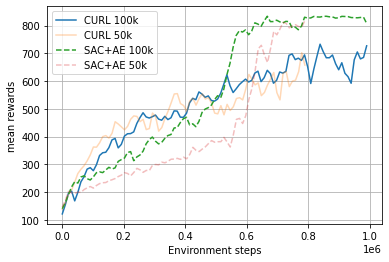

In [66]:
# plotting Curl 5,50 and 100 k
average_over_last_steps = 20000
max_step = 5e5
cal_mean_each_step = 10000
plots = [0, 0, 0,0,0]
_, plots[0] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
_, plots[1] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)

_, plots[3] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step, linestyle='dashed')
_, plots[4] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step, linestyle='dashed')
_, plots[2] = plot_data("CURL_5k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
print(plots)
# plt.legend(plots, ["Curl 5k", "Curl 50k", "Curl 100k"])
# plt.savefig("docs/images/CURL_replay_compare")
# plt.show()

plots.append(plot)
_, plot = plot_data("SAC-AE_5k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step, linestyle='dashed')
plots.append(plot)
print(plots)
plt.legend(plots, ["Curl 100k", "Curl 50k","Curl 5k"]+["SAC+AE 100k", "SAC+AE 50k","SAC+AE 5k"])
plt.ylim((0,820))
plt.grid()
plt.tight_layout()
# plt.savefig("docs/images/SAC-AE_replay_compare")
plt.savefig("docs/images/CURL_and_Sac_compare")
plt.show()
# plot comparison of SAC-AE and CURL
# max_step  =5e5
# average_over_last_steps = 20000
# cal_mean_each_step = 5000

# plots = [0] * 4
# plots[0] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=max_step)[1]
# plots[1] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=max_step)[1]
# plots[2] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3)[1]
# plots[3] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3)[1]
# print(plots)
# plt.legend(plots, ["SAC+AE 100k", "CURL 100k", "SAC+AE 50k", "CURL 50k"])

# plt.ylim((0,820))
# plt.grid()
# plt.savefig("docs/images/compare_sac_and_curl")
# plt.show()
max_step  =1e6

plots = [0] * 4
plots[0] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step)[1]
plots[1] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3)[1]
plots[2] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step, linestyle='dashed')[1]

plots[3] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3, linestyle='dashed')[1]

print(plots)
plt.legend(plots, ["CURL 100k", "CURL 50k","SAC+AE 100k",  "SAC+AE 50k"])
plt.grid()
plt.savefig("docs/images/compare_sac_and_curl_big")
plt.show()
#
# plots = [0] * 4
# plots[0] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5)[1]
# plots[1] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5)[1]
# plots[2] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5, alpha=0.3)[1]
# plots[3] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5, alpha=0.3)[1]
# print(plots)
# plt.legend(plots, ["SAC+AE 100k", "CURL 100k", "SAC+AE 50k", "CURL 50k"])
# plt.show()

In [3]:
class Args():
    pass
import json
import dmc2gym
import os
import utils
# Visualizing kernels and featuremaps
def load_encoder_model(file_name="tmp/cartpole_06-08-2021-18-27-43-freeze-encoder", step=50000):
    if file_name.startswith("tmp/cartpole"):
        frame_skip = 8
        domain_name =  'cartpole'
        task_name = "swingup"
    else:
        frame_skip = 2
        domain_name = 'walker'
        task_name = "walk"
    args_file = open(file_name+"/args.json", 'r')
    args = Args()
    _args = json.load(args_file)
    for a in _args:
        print(a, _args[a])
        setattr(args, a, _args[a])
    utils.set_seed_everywhere(args.seed)
    model_dir = utils.make_dir(os.path.join(file_name, 'model'))
    env = dmc2gym.make(
        domain_name=domain_name,
        task_name=task_name,
        seed=1,
        visualize_reward=False,
        from_pixels=True,
        height=100,
        width=100,
        frame_skip=frame_skip
    )
    if args.encoder_type == 'pixel':
        env = utils.FrameStack(env, k=args.frame_stack)
    shape = env.observation_space.shape
    agent = make_agent(
        # Change the image shape to accept cropped images. Keep the frame count
        obs_shape=(shape[0], 84, 84),
        action_shape=env.action_space.shape,
        args=args,
        device='cpu'
    )
    # L: Logger = torch.load(file_name + "/logger/l.pt")
    # L._sw = SummaryWriter(L.tb_dir)
    agent.load(model_dir, step)
    replay_buffer = utils.ReplayBuffer(
        obs_shape=env.observation_space.shape,
        action_shape=env.action_space.shape,
        capacity=args.replay_buffer_capacity,
        batch_size=args.batch_size,
        device='cpu',
        crop_size=args.image_size
    )
    replay_buffer.load(file_name, 5000)
    encoder = agent.encoder
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    encoder.query.convs[0].register_forward_hook(get_activation('conv1'))
    encoder.query.convs[1].register_forward_hook(get_activation('conv2'))
    encoder.query.convs[2].register_forward_hook(get_activation('conv3'))
    encoder.query.convs[3].register_forward_hook(get_activation('conv4'))
    return encoder, env, replay_buffer, activation

import torch
import matplotlib.pyplot as plt
# PLotting kernel and activation layers

action_repeat 8
actor_beta 0.9
actor_log_std_max 2
actor_log_std_min -10
actor_lr 0.001
actor_update_freq 2
agent sac_curl
alpha_beta 0.5
alpha_lr 0.0001
batch_size 256
critic_beta 0.9
critic_lr 0.001
critic_target_update_freq 2
critic_tau 0.01
discount 0.99
domain_name cartpole
encoder_feature_dim 50
encoder_lr 0.001
encoder_tau 0.05
encoder_type pixel
eval_freq 5000
frame_stack 3
freeze_encoder 50000
hidden_dim 1024
image_size 84
init_steps 1000
init_temperature 0.1
load tmp/cartpole_06-08-2021-18-27-43-freeze-encoder
num_eval_episodes 10
num_filters 32
num_layers 4
num_train_steps 1000000
only_cpu False
pre_transform_image_size 100
replay_buffer_capacity 100000
save_buffer True
save_model True
save_tb True
save_video True
seed 1
task_name swingup
work_dir tmp/cartpole_06-08-2021-18-27-43-freeze-encoder


/home/gijs/anaconda3/envs/curl2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


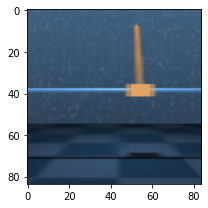

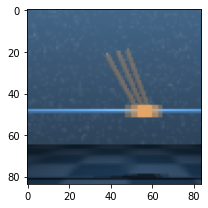

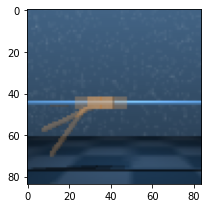

32
32
32


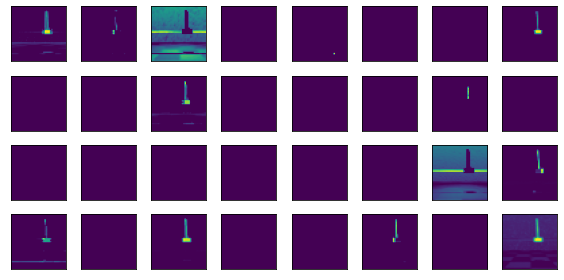

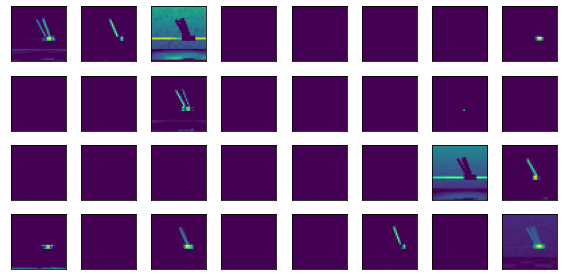

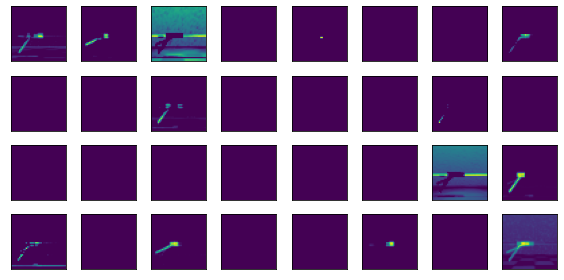

In [62]:
encoder, env, replay_buffer, activation = load_encoder_model()

utils.set_seed_everywhere(1)
observation_indexes = [0,5,3]
all_obs, obs_other_augmentation, action, reward, next_obs, not_done = replay_buffer.sample()
# for i in range(len(all_obs)):
#     obs = all_obs[i]
#     plt.figure(figsize=(5,5))
#     first_frame = obs.squeeze(0)[:3].permute(1,2,0)/255
#     plt.imshow(first_frame)
#     plt.show()
for plot_i, i in enumerate(observation_indexes):
    fig=plt.figure(figsize=(3,3))
    obs = all_obs[i:i+1]
    img = obs.squeeze(0)[:3]+obs.squeeze(0)[3:6]+obs.squeeze(0)[6:9]
    first_frame = img.permute(1,2,0)/(255*3)
    # fig.add_subplot(1, len(observation_indexes), 1+plot_i)
    plt.imshow(first_frame)
    plt.tight_layout()
    plt.savefig(f"docs/images/example_observation_{plot_i}")
    plt.show()

for conv_index in [1]:
    for i in observation_indexes:
        obs = all_obs[i:i+1]
        encoder.query(obs)
        act = activation[f'conv{conv_index}'].squeeze()
        print(act.size(0))
        # size = act.size(0)
        size = 32
        fig=plt.figure(figsize=(8,4))
        h, w = 4,8
        # fig, axarr = plt.subplots(1, size,figsize=(15,15))
        subplot_i =0
        for idx in range(size):
            fig.add_subplot(h, w, 1+subplot_i)
            plt.imshow(torch.relu(act[idx]))
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
            subplot_i += 1
        plt.tight_layout()

        plt.savefig(f"docs/images/featuremaps_conv_{conv_index}_plot_{i}")

In [5]:
# Visualizing kernels
# from torchvision.utils import make_grid
# #
# kernels = encoder.query.convs[0].weight.detach().clone()
# kernels = kernels - kernels.min()
# kernels = kernels / kernels.max()
# img = make_grid(kernels)
# figure_size = 10
# plt.figure(figsize=(10,10))
# plt.imshow(img[:3,:,:].permute(1, 2, 0))
# fig=plt.figure(figsize=(figure_size,figure_size))
# w, h = 3,3
# for i in range(len(img)):
#     fig.add_subplot(w, h, 1+i)
#     plt.imshow(img[i:i+1].permute(1, 2, 0))

logs/CURL_100k/train.log
time_elapsed: 26097 seconds or 434 minutes
Final reward:  0.07960172149680915


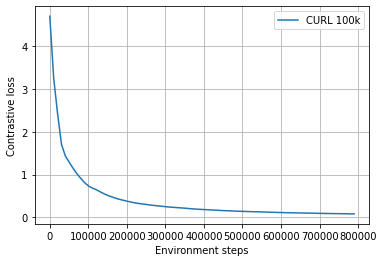

In [6]:
def read_file_encoder_loss(name_of_file, max_step=1e20):
    file = get_file(name_of_file)
    # file.readline()  # skip first two lines with run info
    # file.readline()
    steps = []
    time_stamps = []
    loss_list = []
    line_data = None
    total_time = 0
    for line in file:
        # read lines with json in this format:
        # For train log files: ['episode_reward', 'episode', 'batch_reward', 'critic_loss', 'actor_loss', 'actor_target_entropy', 'actor_entropy', 'alpha_loss', 'alpha_value', 'duration', 'step']
        # For eval log files: ["episode": 0.0, "episode_reward": 8.966967636375767, "step": 0]
        line_data = json.loads(line)

        # line_data = line.split(',')
        # Timestep
        time_step = line_data['step']
        if max_step is not None and time_step > max_step:
            break
        if 'episode_reward' not in line_data or 'curl_loss' not in line_data:
            continue
        loss = line_data['curl_loss']
        duration = line_data['duration']
        total_time += duration
        # time_steps.append(float(line_data[1]))
        steps.append(time_step)
        time_stamps.append(total_time)
        # Rewards
        # rewards.append(float(line_data[4]))
        loss_list.append(loss)
    return np.array(steps), loss_list, time_stamps, total_time

def plot_data_encoder_loss(name_of_file=None, calculate_average_each_step=20000, average_over_last_steps=200000,
              scale_reward=1, only_average=True, color="", max_step=None, x_axis_duration=False, alpha=1.,
              action_repeat=8):
    if max_step is not None:
        max_step /= action_repeat
    time_steps, rewards, time_stamps, time_elapsed = read_file_encoder_loss(name_of_file, max_step)
    time_steps *= action_repeat
    # calculate_average_each_step *= action_repeat
    # average_over_last_steps *= action_repeat
    x_axis = time_steps
    time_in_minutes = False
    if x_axis_duration:
        x_axis = time_stamps
        time_in_minutes = True
    print(f"time_elapsed: {int(float(time_elapsed))} seconds or {int(float(time_elapsed) / 60)} minutes")

    average_reward_list = create_average_reward_list(x_axis, rewards, calculate_average_each_step,
                                                     average_over_last_steps, scale_reward)

    plot = plot_average(average_reward_list, x_axis[-1], average_over_last_steps, show=False, color=color,
                        time_in_minutes=time_in_minutes, alpha=alpha)
    return time_elapsed, plot

_, plot1 = plot_data_encoder_loss("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
          calculate_average_each_step=calculate_average_each_step, max_step=8e5)
plt.legend([plot1], ["CURL 100k"])
plt.ylabel("Contrastive loss")
plt.grid()
plt.savefig("docs/images/encoder_loss")
plt.show()

logs/walker_100k/train_walker.log
time_elapsed: 34748 seconds or 579 minutes
Final reward:  155.52073347954746
logs/walker_100k/train_walker_05-31-2021-13-06-18.log
time_elapsed: 36575 seconds or 609 minutes
Final reward:  181.38077090227537


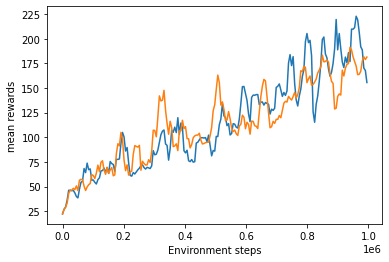

In [7]:
# average_over_last_steps = 20000
# cal_mean_each_step = 5000
# max_step = 10e5
# import matplotlib.pyplot as plt

# from plot_data import plot_data, read_file, create_average_reward_list, plot_average, get_file

# plot_data("walker_100k/train_walker.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=max_step)

# # plot_data("walker_100k/train_walker_05-29-2021-01-26-17.log", average_over_last_steps=average_over_last_steps,
# #                      calculate_average_each_step=cal_mean_each_step, max_step=max_step)

# plot_data("walker_100k/train_walker_05-31-2021-13-06-18.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=max_step)
# plt.show()

action_repeat 2
actor_beta 0.9
actor_log_std_max 2
actor_log_std_min -10
actor_lr 0.001
actor_update_freq 2
agent sac_curl
alpha_beta 0.5
alpha_lr 0.0001
batch_size 256
critic_beta 0.9
critic_lr 0.001
critic_target_update_freq 2
critic_tau 0.01
discount 0.99
domain_name walker
encoder_feature_dim 50
encoder_lr 0.001
encoder_tau 0.05
encoder_type pixel
eval_freq 5000
frame_stack 3
freeze_encoder False
hidden_dim 1024
image_size 84
init_steps 1000
init_temperature 0.1
load 
num_eval_episodes 10
num_filters 32
num_layers 4
num_train_steps 1000000
only_cpu False
pre_transform_image_size 100
replay_buffer_capacity 100000
save_buffer True
save_model True
save_tb True
save_video True
seed 1
task_name walk
work_dir ./tmp/walker_05-31-2021-13-06-18


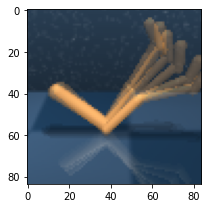

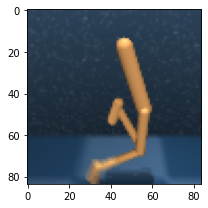

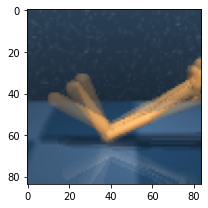

32
32
32


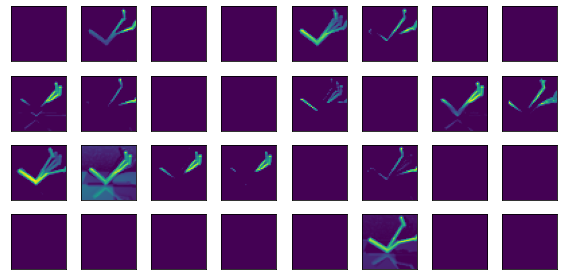

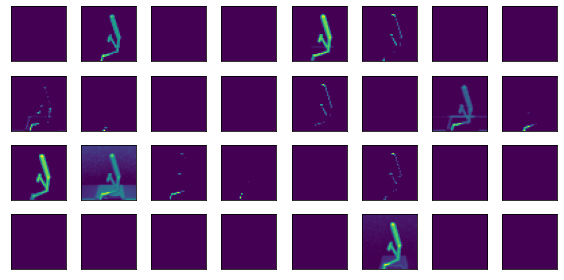

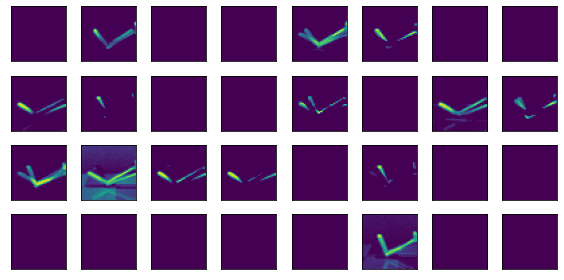

In [63]:
encoder, env, replay_buffer,activation = load_encoder_model("tmp/walker_05-31-2021-13-06-18",step=135000)

utils.set_seed_everywhere(1)
observation_indexes = [0,5,3]
all_obs, obs_other_augmentation, action, reward, next_obs, not_done = replay_buffer.sample()
# for i in range(len(all_obs)):
#     obs = all_obs[i]
#     plt.figure(figsize=(5,5))
#     first_frame = obs.squeeze(0)[:3].permute(1,2,0)/255
#     plt.imshow(first_frame)
#     plt.show()
for plot_i, i in enumerate(observation_indexes):
    fig=plt.figure(figsize=(3,3))
    obs = all_obs[i:i+1]
    img = obs.squeeze(0)[:3]+obs.squeeze(0)[3:6]+obs.squeeze(0)[6:9]
    first_frame = img.permute(1,2,0)/(255*3)
    plt.imshow(first_frame)
    plt.tight_layout()
    plt.savefig(f"docs/images/walker_example_observation_{plot_i}")
    plt.show()

for conv_index in [1]:
    for i in observation_indexes:
        obs = all_obs[i:i+1]
        encoder.query(obs)
        act = activation[f'conv{conv_index}'].squeeze()
        print(act.size(0))
        # size = act.size(0)
        size = 32
        fig=plt.figure(figsize=(8,4))
        h, w = 4,8
        # fig, axarr = plt.subplots(1, size,figsize=(15,15))
        subplot_i =0
        for idx in range(size):
            fig.add_subplot(h, w, 1+subplot_i)
            plt.imshow(torch.relu(act[idx]))
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
            subplot_i += 1
        plt.tight_layout()

        plt.savefig(f"docs/images/walker_featuremaps_conv_{conv_index}_plot_{i}")